# 4.1.3.
1. Usando  uma  representação  gráfica adequada,  compare  as  distribuições  do  número  de mortes 
prematuras (Value) em **Portugal**, **Espanha, França e Itália.** 

## *Imports* estáticos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Leitura de Ficheiro

In [2]:
dados = pd.read_csv('../dados/AIRPOL_data.csv', delimiter=";", header=0)
dados = dados.drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'])

## Filtro de Valores por País

In [3]:
dados['Value'] = dados['Value'].astype(str).str.replace(',', '.').astype(float)  # Ensure 'Value' is numeric
dados_agrupados = dados[dados['Country'].isin(['Portugal', 'Spain', 'France', 'Italy'])].groupby(['Outcome', 'Country'], as_index=False)['Value'].sum()


## Comparaçâo de Número total de Mortes por tipo em Cada País.

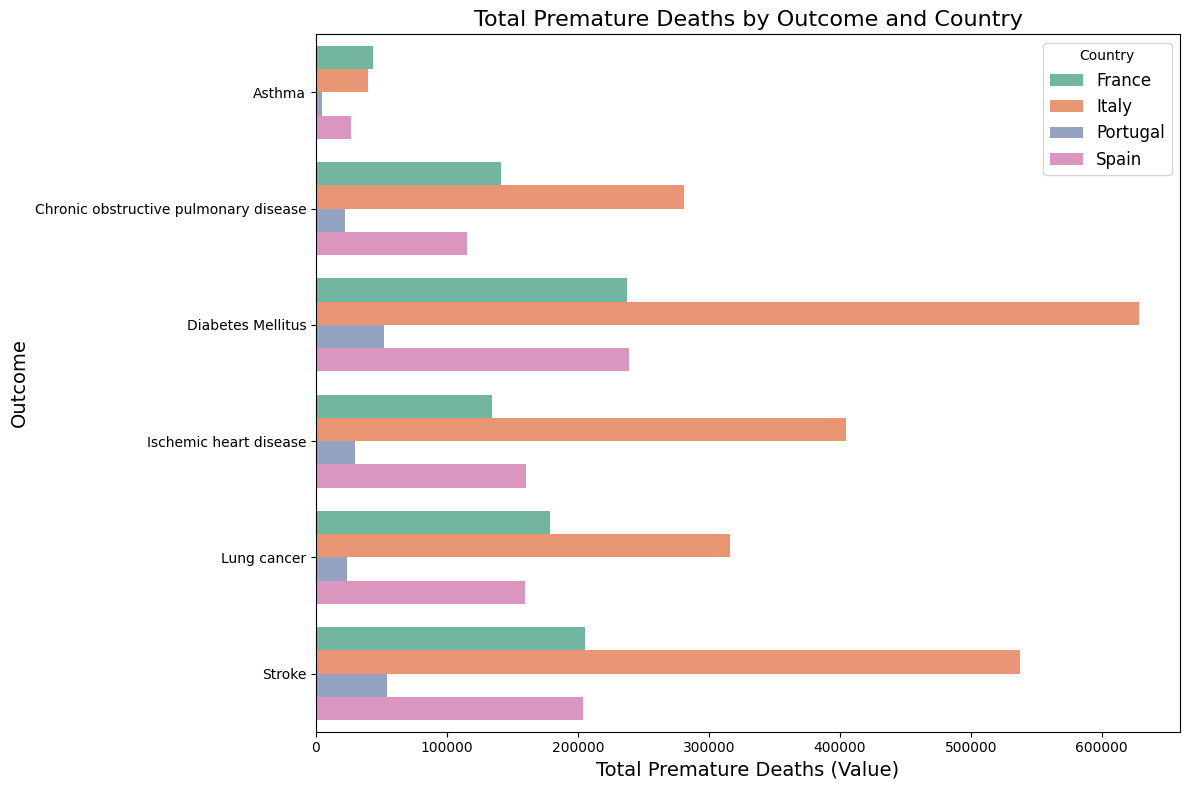

In [4]:
# Plot the grouped data
plt.figure(figsize=(12, 8))
sns.barplot(data=dados_agrupados, y='Outcome', x='Value', hue='Country', palette='Set2', orient='h')

# Add labels and title
plt.title('Total Premature Deaths by Outcome and Country', fontsize=16)
plt.xlabel('Total Premature Deaths (Value)', fontsize=14)
plt.ylabel('Outcome', fontsize=14)
plt.legend(title='Country', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Pequenas Conclusões Retiradas do Gráfico

- A **Itália** destaca-se claramente por apresentar o maior número de mortes na maioria dos tipos de doenças (exceto asma, embora os valores também sejam elevados).
- A **França** apresenta um número de mortes ligeiramente mais elevado em comparação com os restantes países.
- **Portugal** destaca-se como o país com o menor número de mortes na maioria das doenças.
- Conclui-se também que, independentemente do país, a **asma** é a causa com menos mortes, enquanto a **diabetes** e o **enfarte (stroke)** são os outcomes mais letais.


## Filtro dados por Nuts

In [5]:
# Ensure df_filtrado is defined
df_filtrado = dados[dados['Country'].isin(['Portugal', 'Spain', 'France', 'Italy'])]


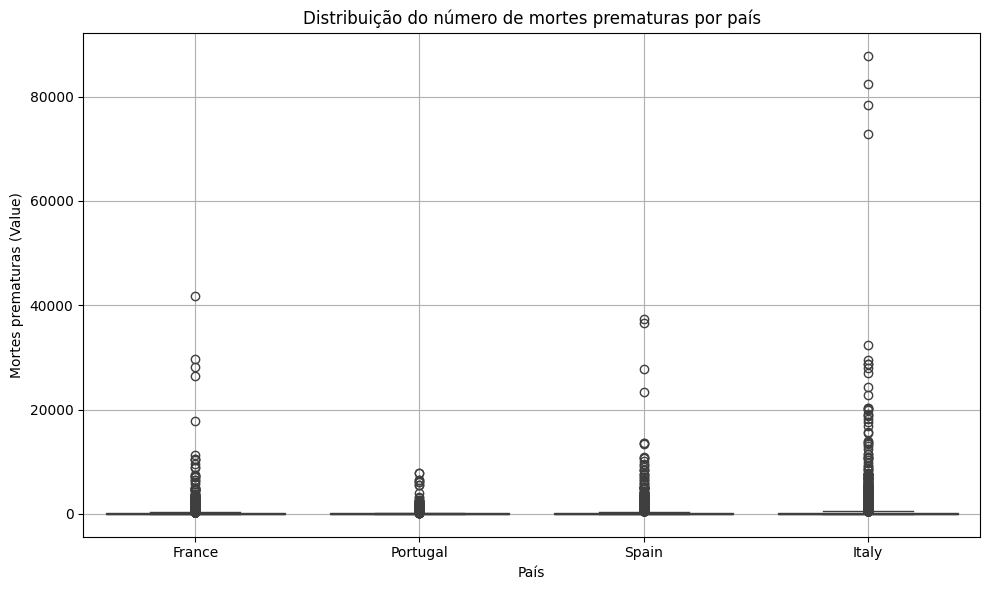

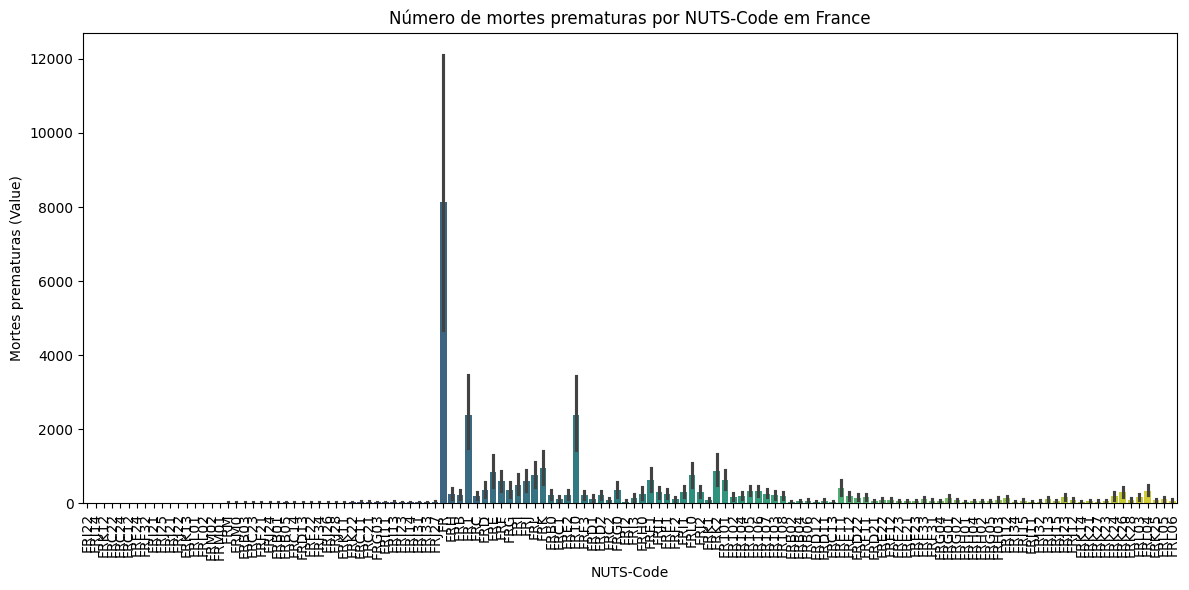

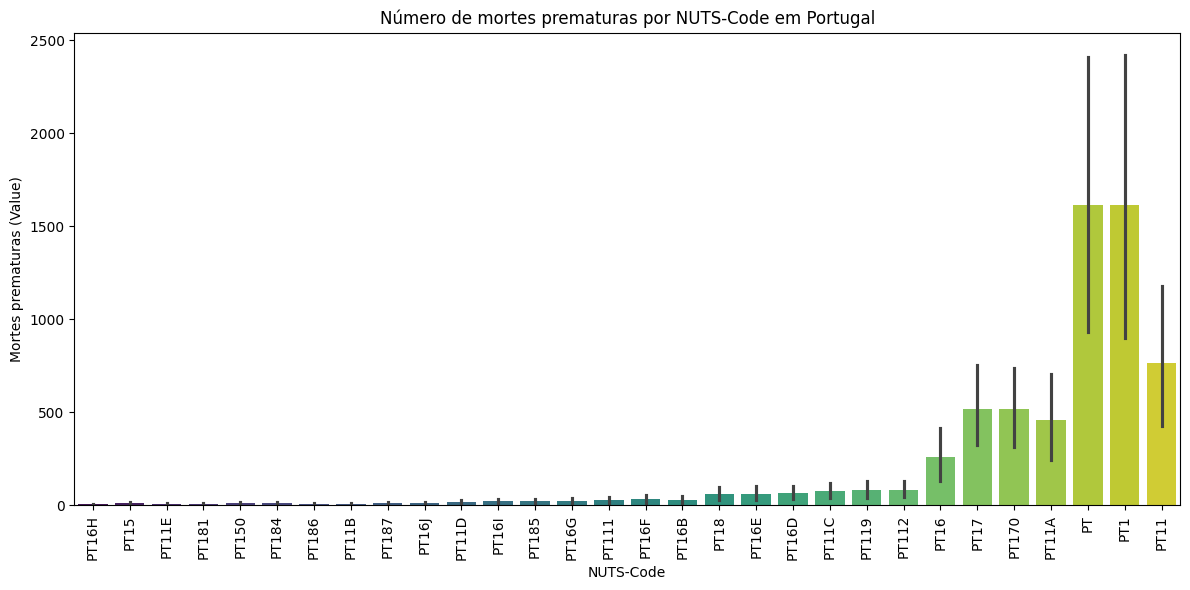

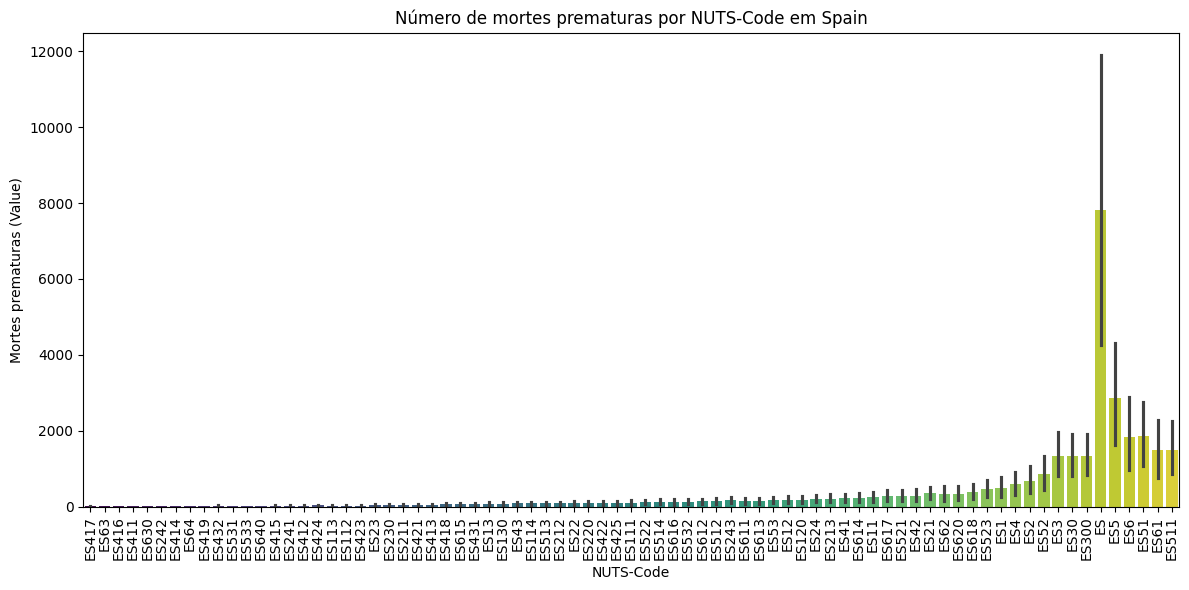

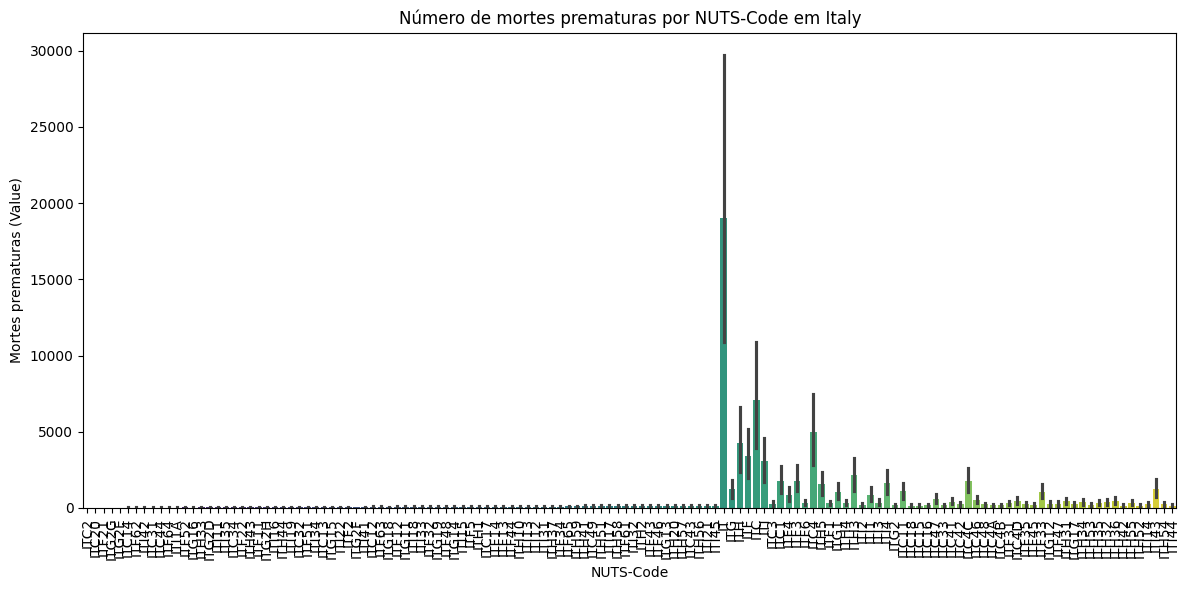

In [6]:
# Gráfico de distribuição geral por país
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x='Country', y='Value')
plt.title('Distribuição do número de mortes prematuras por país')
plt.xlabel('País')
plt.ylabel('Mortes prematuras (Value)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico para cada país (evitando warning com `palette`)
# Define the list of countries
paises = df_filtrado['Country'].unique()

# Loop through each country
for country in paises:
    country_data = df_filtrado[df_filtrado['Country'] == country]
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=country_data,
        x='NUTS_Code',
        y='Value',
        hue='NUTS_Code',
        palette='viridis',
        legend=False  # evita mostrar legenda repetida
    )
    plt.title(f'Número de mortes prematuras por NUTS-Code em {country}')
    plt.xlabel('NUTS-Code')
    plt.ylabel('Mortes prematuras (Value)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Escolha para não remoção de Outliers.
 Destaca a real descrepância entre os nuts(distritos), e claramente realça os distrititos não só suportam mais mortes, como suportam o número geral de mortes do País. 
 
 (Possível motivo:Informar / alertar as pessoas quando forem para esses táis distritos.)

## Conclusão de Comparação de Distribuições de Mortes por País.

- A **Itália** apresenta o maior número de mortes prematuras, possivelmente devido à sua maior população.  
- As mortes não estão uniformemente distribuídas dentro dos países — **1 ou 2 regiões (NUTS-Code)** concentram a maioria dos óbitos.  
- Isso revela **desigualdades regionais** e destaca a importância de políticas de saúde mais focadas localmente.